In [1]:
import mandatory_libraries as ml

In [2]:
# import load_stocks as stocks

In [3]:
csv_path = ml.Path('Resources/Stocks - Sheet1.csv')
stocks = ml.pd.read_csv(csv_path, header=0, index_col=0).dropna(how='all', axis=1)

In [4]:
def set_stocks():
    stocks_df = ml.pd.DataFrame()
    for i in stocks.index:
        stocks_df[i] = ml.get_data(i)['close']
    stocks_df.index = ml.pd.to_datetime(stocks_df.index)
    stocks_df.dropna(inplace=True)
    return stocks_df
set_stocks().head()

,AAPL,SPY,GOOG,TSM,NVDA,MSFT,T,VZ,TMUS,PYPL,VGT,AMZN,IBM,NFLX
2015-07-06,31.500000,206.720001,522.859985,22.940001,20.170000,44.389999,35.610001,47.040001,38.549999,36.709999,106.449997,436.040009,164.729996,94.571426
2015-07-07,31.422501,208.020004,525.020020,22.959999,19.790001,44.299999,35.770000,47.250000,38.680000,36.619999,106.470001,436.720001,165.000000,94.091431
2015-07-08,30.642500,204.529999,516.830017,22.230000,19.650000,44.240002,34.790001,46.580002,38.470001,34.700001,104.669998,429.700012,163.160004,93.507141
2015-07-09,30.017500,204.899994,520.679993,22.219999,19.410000,44.520000,34.389999,46.259998,38.770000,34.500000,104.440002,434.390015,163.850006,95.727142
2015-07-10,30.820000,207.479996,530.130005,22.570000,19.750000,44.610001,34.650002,47.000000,39.029999,34.689999,105.989998,443.510010,166.949997,97.228569


In [5]:
def get_stocks_pct_change():
    result = set_stocks().pct_change()
    result.dropna(inplace= True)
    return result


In [6]:
def get_stocks_list():
    return stocks.index.tolist()
get_stocks_list()

['AAPL',
 'SPY',
 'GOOG',
 'TSM',
 'NVDA',
 'MSFT',
 'T',
 'VZ',
 'TMUS',
 'PYPL',
 'VGT',
 'AMZN',
 'IBM',
 'NFLX']

In [7]:
def set_lags():
    stocks_pct = set_stocks()
    for stocks in get_stocks_list():
        stocks_pct[stocks+' Lag'] = stocks_pct[stocks].shift()
        if (stocks!='AAPL'):
            stocks_pct.drop(columns=stocks, inplace=True)

    stocks_pct = stocks_pct.dropna()
    return stocks_pct
set_lags().head()

,AAPL,AAPL Lag,SPY Lag,GOOG Lag,TSM Lag,NVDA Lag,MSFT Lag,T Lag,VZ Lag,TMUS Lag,PYPL Lag,VGT Lag,AMZN Lag,IBM Lag,NFLX Lag
2015-07-07,31.422501,31.500000,206.720001,522.859985,22.940001,20.170000,44.389999,35.610001,47.040001,38.549999,36.709999,106.449997,436.040009,164.729996,94.571426
2015-07-08,30.642500,31.422501,208.020004,525.020020,22.959999,19.790001,44.299999,35.770000,47.250000,38.680000,36.619999,106.470001,436.720001,165.000000,94.091431
2015-07-09,30.017500,30.642500,204.529999,516.830017,22.230000,19.650000,44.240002,34.790001,46.580002,38.470001,34.700001,104.669998,429.700012,163.160004,93.507141
2015-07-10,30.820000,30.017500,204.899994,520.679993,22.219999,19.410000,44.520000,34.389999,46.259998,38.770000,34.500000,104.440002,434.390015,163.850006,95.727142
2015-07-13,31.415001,30.820000,207.479996,530.130005,22.570000,19.750000,44.610001,34.650002,47.000000,39.029999,34.689999,105.989998,443.510010,166.949997,97.228569


In [8]:
import requests
import pandas as pd
from io import BytesIO
#Open Google Sheets and import Apple Earnings Results
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1wb79glLhg17blGb0HoryEL8-yvhaCR9-L5nCQ8a706U&output=csv')
data = r.content
apple_earning = pd.read_csv(BytesIO(data), index_col=0)
apple_earning.head()

,Quarter End,Estimated EPS,Actual EPS,Result
Date,,,,
2015-01-27,2014-12-31,0.65,0.77,1.18
2015-04-27,2015-03-31,0.55,0.58,1.05
2015-07-21,2015-06-30,0.45,0.46,1.02
2015-10-27,2015-09-30,0.47,0.49,1.04
2016-01-26,2015-12-31,0.81,0.82,1.01


In [9]:
#Open Google Sheets and import iphone Launch 
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1DgdNNZCbt9x---CQCmvRn2cSrf1AEdH1OBpU_aMZkg4&output=csv')
data = r.content
iphone_launch = pd.read_csv(BytesIO(data), index_col=0)
iphone_launch.head()

,iphone
Date,
2007-06-29,1
2008-07-11,1
2010-06-24,1
2012-09-21,1
2014-09-19,1


In [10]:
apple_info = apple_earning.join(iphone_launch, how='outer')
apple_info = apple_info.drop(['Quarter End'], axis=1)
apple_info = apple_info.drop(['Estimated EPS'], axis=1)
apple_info = apple_info.drop(['Actual EPS'], axis=1)
apple_info.head()

,Result,iphone
Date,,
2007-06-29,NaN,1.0
2008-07-11,NaN,1.0
2010-06-24,NaN,1.0
2012-09-21,NaN,1.0
2014-09-19,NaN,1.0


In [11]:
combined_df = set_lags()
combined_df = combined_df.join(apple_info, how='outer')
combined_df = combined_df[combined_df['AAPL'].notna()]
combined_df['iphone'].fillna(0, inplace=True)
combined_df['Result'].fillna(1, inplace=True)
combined_df.head()

,AAPL,AAPL Lag,SPY Lag,GOOG Lag,TSM Lag,NVDA Lag,MSFT Lag,T Lag,VZ Lag,TMUS Lag,PYPL Lag,VGT Lag,AMZN Lag,IBM Lag,NFLX Lag,Result,iphone
2015-07-07,31.422501,31.500000,206.720001,522.859985,22.940001,20.170000,44.389999,35.610001,47.040001,38.549999,36.709999,106.449997,436.040009,164.729996,94.571426,1.0,0.0
2015-07-08,30.642500,31.422501,208.020004,525.020020,22.959999,19.790001,44.299999,35.770000,47.250000,38.680000,36.619999,106.470001,436.720001,165.000000,94.091431,1.0,0.0
2015-07-09,30.017500,30.642500,204.529999,516.830017,22.230000,19.650000,44.240002,34.790001,46.580002,38.470001,34.700001,104.669998,429.700012,163.160004,93.507141,1.0,0.0
2015-07-10,30.820000,30.017500,204.899994,520.679993,22.219999,19.410000,44.520000,34.389999,46.259998,38.770000,34.500000,104.440002,434.390015,163.850006,95.727142,1.0,0.0
2015-07-13,31.415001,30.820000,207.479996,530.130005,22.570000,19.750000,44.610001,34.650002,47.000000,39.029999,34.689999,105.989998,443.510010,166.949997,97.228569,1.0,0.0


In [12]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return ml.np.array(X), ml.np.array(y).reshape(-1, 1)

In [13]:
def getSampleValues_stocks():
    # Creating the features (X) and target (y) data using the window_data() function.
    window_size = 5
    feature_column = 0
    target_column = 0
    X, y = window_data(combined_df, window_size, feature_column, target_column)
    return X,y
getSampleValues_stocks()

(array([[ 31.42250061,  30.64249992,  30.01749992,  30.81999969,
          31.41500092],
        [ 30.64249992,  30.01749992,  30.81999969,  31.41500092,
          31.40250015],
        [ 30.01749992,  30.81999969,  31.41500092,  31.40250015,
          31.70499992],
        ...,
        [133.41000366, 133.11000061, 134.77999878, 136.33000183,
         136.96000671],
        [133.11000061, 134.77999878, 136.33000183, 136.96000671,
         137.27000427],
        [134.77999878, 136.33000183, 136.96000671, 137.27000427,
         139.96000671]]),
 array([[ 31.40250015],
        [ 31.70499992],
        [ 32.12749863],
        ...,
        [137.27000427],
        [139.96000671],
        [142.02000427]]))

In [14]:
def getTestingData_stocks(percent_training=70/100):
    # Use 70% of the data for training and the remainder for testing
    X, y = getSampleValues_stocks()
    split = int(percent_training * len(X))
    X_train = X[: split]
    X_test = X[split:]
    y_train = y[: split]
    y_test = y[split:]
    return X_train, X_test, y_train, y_test
getTestingData_stocks(percent_training=70/100)


(array([[31.42250061, 30.64249992, 30.01749992, 30.81999969, 31.41500092],
        [30.64249992, 30.01749992, 30.81999969, 31.41500092, 31.40250015],
        [30.01749992, 30.81999969, 31.41500092, 31.40250015, 31.70499992],
        ...,
        [53.54249954, 54.17499924, 55.89749908, 55.77249908, 54.6875    ],
        [54.17499924, 55.89749908, 55.77249908, 54.6875    , 54.97499847],
        [55.89749908, 55.77249908, 54.6875    , 54.97499847, 55.17499924]]),
 array([[ 55.77249908,  54.6875    ,  54.97499847,  55.17499924,
          55.69250107],
        [ 54.6875    ,  54.97499847,  55.17499924,  55.69250107,
          55.24000168],
        [ 54.97499847,  55.17499924,  55.69250107,  55.24000168,
          54.43249893],
        ...,
        [133.41000366, 133.11000061, 134.77999878, 136.33000183,
         136.96000671],
        [133.11000061, 134.77999878, 136.33000183, 136.96000671,
         137.27000427],
        [134.77999878, 136.33000183, 136.96000671, 137.27000427,
         139

In [15]:
def scale_TestingData_stocks():
    X, y = getSampleValues_stocks()
    X_train, X_test, y_train, y_test = getTestingData_stocks()
    scaler = ml.MinMaxScaler()
    scaler.fit(X)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    scaler.fit(y)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)
    return X_train, X_test, y_train, y_test, scaler
scale_TestingData_stocks()

(array([[0.07329464, 0.06682563, 0.06164214, 0.06829774, 0.07323244],
        [0.06682563, 0.06164214, 0.06829774, 0.07323244, 0.07312876],
        [0.06164214, 0.06829774, 0.07323244, 0.07312876, 0.07563757],
        ...,
        [0.25674891, 0.2619946 , 0.27628031, 0.27524361, 0.26624507],
        [0.2619946 , 0.27628031, 0.27524361, 0.26624507, 0.26862947],
        [0.27628031, 0.27524361, 0.26624507, 0.26862947, 0.27028819]]),
 array([[0.27524361, 0.26624507, 0.26862947, 0.27028819, 0.27458014],
        [0.26624507, 0.26862947, 0.27028819, 0.27458014, 0.2708273 ],
        [0.26862947, 0.27028819, 0.27458014, 0.2708273 , 0.2641302 ],
        ...,
        [0.91913747, 0.91664937, 0.93049965, 0.94335475, 0.94857975],
        [0.91664937, 0.93049965, 0.94335475, 0.94857975, 0.95115074],
        [0.93049965, 0.94335475, 0.94857975, 0.95115074, 0.97346053]]),
 array([[0.07312876],
        [0.07563757],
        [0.07914161],
        ...,
        [0.26862947],
        [0.27028819],
       

In [16]:
def reshapeFeatures_stocks():
    X_train, X_test, y_train, y_test, scaler = scale_TestingData_stocks()
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    # print(f"X_train sample values:\n{X_train[:5]} \n")
    # print(f"X_test sample values:\n{X_test[:5]}")
    return X_train, X_test, y_train, y_test, scaler
reshapeFeatures_stocks()

(array([[[0.07329464],
         [0.06682563],
         [0.06164214],
         [0.06829774],
         [0.07323244]],
 
        [[0.06682563],
         [0.06164214],
         [0.06829774],
         [0.07323244],
         [0.07312876]],
 
        [[0.06164214],
         [0.06829774],
         [0.07323244],
         [0.07312876],
         [0.07563757]],
 
        ...,
 
        [[0.25674891],
         [0.2619946 ],
         [0.27628031],
         [0.27524361],
         [0.26624507]],
 
        [[0.2619946 ],
         [0.27628031],
         [0.27524361],
         [0.26624507],
         [0.26862947]],
 
        [[0.27628031],
         [0.27524361],
         [0.26624507],
         [0.26862947],
         [0.27028819]]]),
 array([[[0.27524361],
         [0.26624507],
         [0.26862947],
         [0.27028819],
         [0.27458014]],
 
        [[0.26624507],
         [0.26862947],
         [0.27028819],
         [0.27458014],
         [0.2708273 ]],
 
        [[0.26862947],
         [0.270288

In [25]:
def set_LSTM_RNN_stocks_model():
    X_train, X_test, y_train, y_test, scaler = reshapeFeatures_stocks()
    model = ml.Sequential()

    number_units = 5
#     dropout_fraction = 0.2

    # Layer 1
    model.add(ml.LSTM(
        units=number_units,
        return_sequences=True,
        input_shape=(X_train.shape[1], 1))
    )
#     model.add(ml.Dropout(dropout_fraction))
#     # Layer 2
#     model.add(ml.LSTM(units=number_units, return_sequences=True))
#     model.add(ml.Dropout(dropout_fraction))
#     # Layer 3
#     model.add(ml.LSTM(units=number_units))
#     model.add(ml.Dropout(dropout_fraction))
    # Output layer
    model.add(ml.Flatten())
    model.add(ml.Dense(1))

    print('step 1. compile the model')
#     model.compile(optimizer="adam", loss="mean_absolute_percentage_error"), X_train, X_test, y_train, y_test, scaler
    model.compile(optimizer="adam", loss="mean_squared_error"), X_train, X_test, y_train, y_test, scaler

    print('step 2. model summary')
    model.summary()

    print('step 3. Train the model')
    model.fit(X_train, y_train, epochs=35, shuffle=False, batch_size=1, verbose=1)

    print('step 4. Evaluate the model')
    model.evaluate(X_test, y_test)
    return model, X_train, X_test, y_train, y_test, scaler


In [26]:
def get_predictions_stocks():
    model, X_train, X_test, y_train, y_test, scaler = set_LSTM_RNN_stocks_model()
    # Make some predictions
    predicted = model.predict(X_test)

    predicted_prices = scaler.inverse_transform(predicted)
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Create a DataFrame of Real and Predicted values
    stocks_predict = ml.pd.DataFrame({
        "Real": real_prices.ravel(),
        "Predicted": predicted_prices.ravel()
    }, index=set_stocks().index[-len(real_prices):])

    return stocks_predict
result = get_predictions_stocks()

step 1. compile the model
step 2. model summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
flatten_2 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________
step 3. Train the model
Epoch 1/35
1054/1054 [==============================] - 3s 2ms/step - loss: 2.8606e-04
Epoch 2/35
1054/1054 [==============================] - 2s 2ms/step - loss: 3.9993e-04
Epoch 3/35
1054/1054 [==============================] - 2s 1ms/step - loss: 3.7938e-04
Epoch 4/35
1054/1054 [==============================]

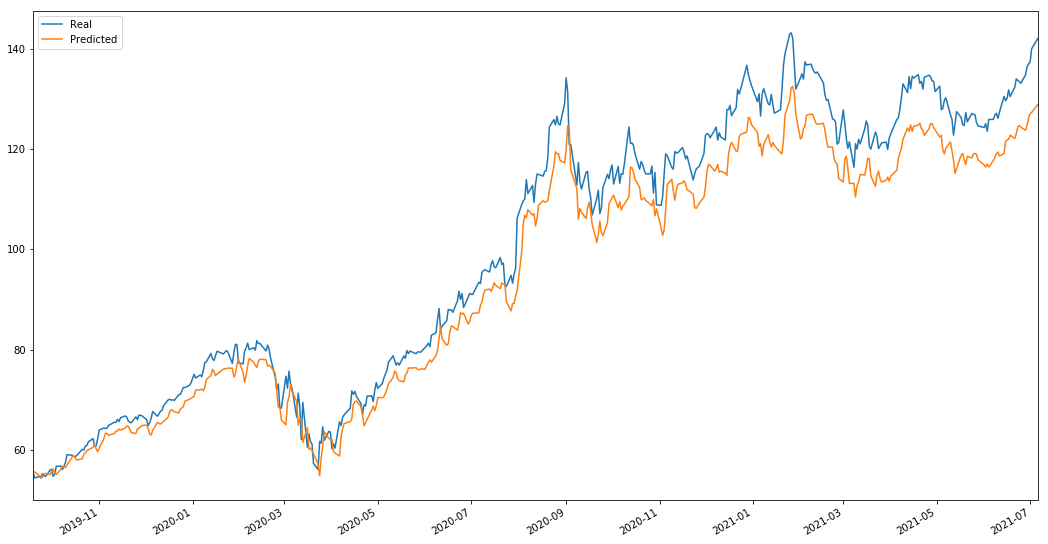

In [27]:
result.plot(figsize=(18, 10))

In [24]:
result

,Real,Predicted
2019-09-19,55.240002,55.615982
2019-09-20,54.432499,55.325699
2019-09-23,54.680000,54.547871
2019-09-24,54.419998,54.655128
2019-09-25,55.257500,54.288357
2019-09-26,54.972500,55.306190
2019-09-27,54.705002,55.081902
2019-09-30,55.992500,54.917767
2019-10-01,56.147499,56.064472
2019-10-02,54.740002,56.048641
